<a href="https://colab.research.google.com/github/fitditcorp4/research/blob/main/weekly_dataset02022023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [139]:
# imports library
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from pandas.plotting import autocorrelation_plot
from random import randrange
from statsmodels.tsa.seasonal import seasonal_decompose
#from pandas import datetime
from datetime import datetime
import numpy as np
from pandas import read_json
from pandas import read_csv
from numpy import array
import matplotlib.colors as colors
import matplotlib.cm as cm
from pylab import rcParams
import warnings
import itertools
from pandas import Series
# plt.style.use('fivethirtyeight')
plt.style.use('classic')
%matplotlib inline

In [140]:
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 10000)
pd.set_option('display.width', 1000)

In [141]:
from google.colab import data_table
data_table.enable_dataframe_formatter

<function google.colab.data_table.enable_dataframe_formatter()>

In [142]:
df0 = pd.read_json('https://oilspillmonitor.ng/api/spill-data.php?dataset=nosdra&format=json')

In [143]:
 df0

,id,status,company,incidentnumber,incidentdate,contaminant,estimatedquantity,sitelocationname,spillareahabitat,lastupdatedby,cause,updatefor,latitude,longitude,statesaffected,attachments,jivdate,lga,zonaloffice,certificatedate,certificatenumber,formadate,reportdate,spillstopdate,initialcontainmentmeasures,descriptionofimpact,formbdate,formcdate,jivpresent,typeoffacility,cleanupcompleteddate,cleanupmethods,cleanupdate,quantityrecovered,postcleanupinspectiondate,finalsamplingdate,estimatedspillarea,remediationstart,remediationtype,remediationend,postimpactassessmentdate,finallabresultsdate
0,2,confirmed,ADDAX,HSE/OBO/0611/101,2006-11-23,cr,225,Subsea Pipeline @ Mimbo Platform (OML123),of,NOSDRA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,confirmed,ADDAX,HSE/OBO/0612/108,2006-12-18,cr,0.5,EBNE04HT @ Ebughu Platform (OML 123),of,NOSDRA,eqf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,confirmed,ADDAX,HSE/OBO/0612/110,2006-12-27,cr,25,South East of BOGI Platform,of,NOSDRA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,confirmed,ADDAX,HSE/OBO/0706/166,2007-05-14,cr,2,Adanga Platform,of,NOSDRA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6,confirmed,ADDAX,HSE/OBO/0708/201,2007-08-16,gs,NaN,"Izombe Well #10LS 4"" Flowline",la,NOSDRA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16437,268127,confirmed,CHEVRON,NOSDRA/009/2023,2023-01-22,no,NaN,18'' DIBI-ABITEYE PIPELINE RoW AT DIBI.,sw,2023-02-08 WA003,sab,268127.0,5.7339444,5.2176944,DE,"[{""url"":""data/attachments/t186274821c1/CJEVRON...",2023-01-31,Warri-North,wa,NaN,NaN,NaN,2023-01-23,NaN,NaN,4'' Ball valve and double flange with pipe ext...,NaN,NaN,"nosdra,cmmnt,cmpny,dpr,mnstry",pl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16438,268124,confirmed,CHEVRON,NOSDRA/006/2023,2023-01-13,no,NaN,12'' OPUEKEBA-OLERO 12 ROW AT OPUAMA.,sw,2023-02-08 WA003,sab,268124.0,5.9068611,5.1013056,DE,"[{""url"":""data/attachments/t186273806dd/CJEVRON...",2023-01-30,Warri-North,wa,NaN,NaN,NaN,2023-01-14,NaN,NaN,12'' Mother Valve illegally attached at 12 O'c...,NaN,NaN,"nosdra,cmmnt,cmpny,dpr,mnstry",fl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16439,268123,confirmed,CHEVRON,NOSDRA/007/2023,2023-01-13,no,NaN,12'' OPUEKEBA-OLERO 12 RoW AT OPUAMA.,sw,2023-02-08 WA003,sab,268123.0,5.8866667,5.0988889,DE,"[{""url"":""data/attachments/t186272cb460/CJEVRON...",2023-01-30,Warri-North,wa,NaN,NaN,NaN,2023-01-14,NaN,NaN,3'' Hot tap Valve illegally attached at 12 O'c...,NaN,NaN,"nosdra,cmmnt,cmpny,dpr,mnstry",fl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16440,268122,confirmed,CHEVRON,NOSDRA/008/2023,2023-01-13,no,NaN,12'' OPUEKEBA-OLERO 12 ROW AT RMP 6 OPUAMA.,sw,2023-02-08 WA003,sab,268122.0,5.9068611,5.1013056,DE,"[{""url"":""data/attachments/t186271a9c79/CJEVRON...",2023-01-30,Warri-North,wa,NaN,NaN,NaN,2023-01-14,NaN,NaN,3'' Ballvalve with about 2'' pipe connection m...,NaN,NaN,"nosdra,cmmnt,cmpny,dpr,mnstry",pl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [144]:
df1 = df0.loc[df0['status'].isin(['confirmed', 'reviewed'])]

In [145]:
#df1['incidentdate'].value_counts()

In [146]:
df1.replace(to_replace='20014-07-08', value='2014-07-08',inplace=True)  # Replaces a typograpical error
df1.replace(to_replace='2016-01-13 AB008', value='2016-01-13',inplace=True)
df1.replace(to_replace='2016-04-14 AB014', value='2016-01-13',inplace=True)
df1.replace(to_replace='2019-08-19 PH133', value='2019-08-19',inplace=True)
df1.replace(to_replace='2019-08-19 PH133, 2020-12-15 PH030, 2021-09-17 PH012, 2021-09-20 PH012, 2021-10-31 PH012', value='2019-08-19',inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [147]:
df1.incidentdate.isna().sum()

590

In [148]:
df1.loc[pd.isnull(df1['incidentdate']), 'incidentdate'] = df1.reportdate
df1.loc[pd.isnull(df1['incidentdate']), 'incidentdate'] = df1.formadate
df1.loc[pd.isnull(df1['incidentdate']), 'incidentdate'] = df1.jivdate
df1.loc[pd.isnull(df1['incidentdate']), 'incidentdate'] = df1.lastupdatedby

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [149]:
df1.incidentdate.isna().sum()

0

In [150]:
df1['contaminant'] = df1['contaminant'].fillna('notavailable')
df1.loc[df1['contaminant'].str.startswith('other'), 'contaminant'] = 'other'
df1.loc[df1['contaminant'].str.startswith('oth'), 'contaminant'] = 'other'
df1.loc[df1['contaminant'].str.startswith('re'), 'contaminant'] = 're'
df1.loc[df1['contaminant'].str.startswith('Die'), 'contaminant'] = 're'
df1.loc[df1['contaminant'].str.startswith('not'), 'contaminant'] = 'na'
df1.loc[df1['contaminant'].str.startswith('Con'), 'contaminant'] = 'co'
df1.loc[df1['contaminant'].str.startswith('CON'), 'contaminant'] = 'co'
df1.loc[df1['contaminant'].str.startswith('co'), 'contaminant'] = 'co'
df1.loc[df1['contaminant'].str.startswith('NIL'), 'contaminant'] = 'na'
df1.loc[df1['contaminant'].str.startswith('LPFO'), 'contaminant'] = 're'
df1.loc[df1['contaminant'].str.startswith('Pro'), 'contaminant'] = 'other'
df1.loc[df1['contaminant'].str.startswith('sheen'), 'contaminant'] = 'other'
df1.loc[df1['contaminant'].str.startswith('Ass'), 'contaminant'] = 'other'
df1.loc[df1['contaminant'].str.startswith('gas'), 'contaminant'] = 'ga'
df1.loc[df1['contaminant'].str.startswith('wa'), 'contaminant'] = 'na'
df1.loc[df1['contaminant'].str.startswith('F'), 'contaminant'] = 'na'
df1.loc[df1['contaminant'].str.startswith('0'), 'contaminant'] = 'na'
df1.loc[df1['contaminant'].str.startswith('gs'), 'contaminant'] = 'ga'
df1.loc[df1['contaminant'].str.startswith('Crude'), 'contaminant'] = 'cr'
df1.loc[df1['contaminant'].str.startswith('crude'), 'contaminant'] = 'cr'

<ipython-input-150-25e6b16a420f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['contaminant'] = df1['contaminant'].fillna('notavailable')
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [151]:
df1.loc[df1['contaminant'].str.startswith('GAS'), 'contaminant'] = 'ga'
df1.loc[df1['contaminant'].str.startswith('None'), 'contaminant'] = 'no'

In [152]:
df1.contaminant.unique()

array(['cr', 'ga', 'other', 'na', 'ch', 're', ' ', 'co', 'no',
       'Non-Leaking', 'Non leaking'], dtype=object)

In [153]:
df2 = df1.loc[df1['contaminant'].isin(['cr', 're', 'co', 'ch'])]

In [154]:
df2.estimatedquantity.isna().sum()

2340

In [155]:
df2.loc[df2['estimatedquantity'].str.startswith('0', na=False), 'estimatedquantity'] = df2['estimatedquantity'].replace(',', '.',  regex=True)
df2['estimatedquantity'] = df2['estimatedquantity'].replace(',', '',  regex=True)
df2['estimatedquantity'] = df2['estimatedquantity'].str.replace('bbl', '')
df2['estimatedquantity'] = df2['estimatedquantity'].str.replace('BBL', '')
df2['estimatedquantity'] = df2['estimatedquantity'].str.replace('Bbl', '')
df2['estimatedquantity'] = df2['estimatedquantity'].str.replace('Barrel', '')
df2['estimatedquantity'] = df2['estimatedquantity'].str.replace('BARREL', '')
df2['estimatedquantity'] = df2['estimatedquantity'].str.replace('bblS', '')
df2['estimatedquantity'] = df2['estimatedquantity'].str.replace('BBLS', '')
df2['estimatedquantity'] = df2['estimatedquantity'].str.replace('barrels', '')
df2['estimatedquantity'] = df2['estimatedquantity'].str.replace('Barrels', '')
df2['estimatedquantity'] = df2['estimatedquantity'].str.replace('I', '1')

<ipython-input-155-bf50b7c2b421>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['estimatedquantity'] = df2['estimatedquantity'].replace(',', '',  regex=True)
<ipython-input-155-bf50b7c2b421>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['estimatedquantity'] = df2['estimatedquantity'].str.replace('bbl', '')
<ipython-input-155-bf50b7c2b421>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [156]:
df2.loc[df2['estimatedquantity'].str.startswith('0', na=False), 'estimatedquantity'] = df2['estimatedquantity'].replace(',', '.',  regex=True)
df2['estimatedquantity'] = df2['estimatedquantity'].replace(',', '',  regex=True)
df2['estimatedquantity'] = df2['estimatedquantity'].str.replace('bbl', '')
df2['estimatedquantity'] = df2['estimatedquantity'].str.replace('BBL', '')
df2['estimatedquantity'] = df2['estimatedquantity'].str.replace('Bbl', '')
df2['estimatedquantity'] = df2['estimatedquantity'].str.replace('Barrel', '')
df2['estimatedquantity'] = df2['estimatedquantity'].str.replace('BARREL', '')
df2['estimatedquantity'] = df2['estimatedquantity'].str.replace('bblS', '')
df2['estimatedquantity'] = df2['estimatedquantity'].str.replace('BBLS', '')
df2['estimatedquantity'] = df2['estimatedquantity'].str.replace('barrels', '')
df2['estimatedquantity'] = df2['estimatedquantity'].str.replace('Barrels', '')
df2['estimatedquantity'] = df2['estimatedquantity'].str.replace('I', '1')

<ipython-input-156-bf50b7c2b421>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['estimatedquantity'] = df2['estimatedquantity'].replace(',', '',  regex=True)
<ipython-input-156-bf50b7c2b421>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['estimatedquantity'] = df2['estimatedquantity'].str.replace('bbl', '')
<ipython-input-156-bf50b7c2b421>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [157]:
df3 = df2.loc[(df2['incidentdate'] > '2005-12-31') & (df2['incidentdate'] <'2022-12-31')]

In [158]:
df3['incidentdate'] = pd.DatetimeIndex(df3['incidentdate'])

<ipython-input-158-3ce1f0b5bdb3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['incidentdate'] = pd.DatetimeIndex(df3['incidentdate'])


In [159]:
df3.estimatedquantity = pd.to_numeric(df3.estimatedquantity, errors = 'coerce')

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [160]:
df3.columns

Index(['id', 'status', 'company', 'incidentnumber', 'incidentdate', 'contaminant', 'estimatedquantity', 'sitelocationname', 'spillareahabitat', 'lastupdatedby', 'cause', 'updatefor', 'latitude', 'longitude', 'statesaffected', 'attachments', 'jivdate', 'lga', 'zonaloffice', 'certificatedate', 'certificatenumber', 'formadate', 'reportdate', 'spillstopdate', 'initialcontainmentmeasures', 'descriptionofimpact', 'formbdate', 'formcdate', 'jivpresent', 'typeoffacility', 'cleanupcompleteddate', 'cleanupmethods', 'cleanupdate', 'quantityrecovered', 'postcleanupinspectiondate', 'finalsamplingdate', 'estimatedspillarea', 'remediationstart', 'remediationtype', 'remediationend', 'postimpactassessmentdate', 'finallabresultsdate'], dtype='object')

In [161]:
dfbi =  df3[['incidentdate','company','contaminant','estimatedquantity','spillareahabitat','cause']]
dfbii = df3.set_index('incidentdate')

In [162]:
from google.colab import files

In [163]:
dfbi.to_csv('dfbii.csv')

In [164]:
#files.download('dfbii.csv')

In [165]:
df4w = df3.groupby([pd.Grouper(key='incidentdate', freq='W')])['estimatedquantity'].agg(['sum','size'])
df4m = df3.groupby([pd.Grouper(key='incidentdate', freq='M')])['estimatedquantity'].agg(['sum','size'])

In [166]:
df4m.tail()

,sum,size
incidentdate,,
2022-08-31,863.269540,67
2022-09-30,493.283100,60
2022-10-31,538.790554,43
2022-11-30,1240.313000,19
2022-12-31,450.980580,16


In [167]:
df4w = df4w.rename(columns={'sum':'estimatedqty', 'size':'spillno'})
df4m = df4m.rename(columns={'sum':'estimatedqty', 'size':'spillno'})

In [168]:
!pip install h2o -qq

In [169]:
import h2o
from h2o.automl import H2OAutoML

In [170]:
# Start the H2O cluster (locally)
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,3 hours 1 min
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.1
H2O_cluster_version_age:,10 hours and 54 minutes
H2O_cluster_name:,H2O_from_python_unknownUser_3m7e13
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [171]:
#Feature Engineering for the weekly datasets
df4wi = df4w[["spillno"]]
df4wi= df4wi.reset_index()
df4wi["month"] = df4wi["incidentdate"].dt.month
df4wi["year"] = df4wi["incidentdate"].dt.year
df4wi["week"] = df4wi["incidentdate"].dt.isocalendar().week
df4wi = df4wi[["incidentdate","spillno","month", "year","week"]]
df4wi = df4wi.set_index("incidentdate")

In [172]:
#Feature Engineering for the monthly datasets
df4mi = df4m[["spillno"]]
df4mi= df4mi.reset_index()
df4mi["month"] = df4mi["incidentdate"].dt.month
df4mi["year"] = df4mi["incidentdate"].dt.year
df4mi = df4mi[["incidentdate","spillno","month", "year"]]
df4mi = df4mi.set_index("incidentdate")

In [174]:
len(df4wi)

887

In [222]:
#Split into train, validation and test

data_train = df4wi.iloc[0 : 799]
data_val = df4wi.iloc[799 : 879]
data_test = df4wi.iloc[879 : ]



print(
    f"Train dates      : {data_train.index.min()} --- {data_train.index.max()}")

print(
    f"Validation dates : {data_val.index.min()} --- {data_val.index.max()}")

print(
    f"Test dates       : {data_test.index.min()} --- {data_test.index.max()}")
print(f"Length of Training dataset  : {len(data_train)}")
print(f"Length of Validation dataset  : {len(data_val)}")
print(f"Length of Test dataset  : {len(data_test)}")



Train dates      : 2006-01-08 00:00:00 --- 2021-04-25 00:00:00
Validation dates : 2021-05-02 00:00:00 --- 2022-11-06 00:00:00
Test dates       : 2022-11-13 00:00:00 --- 2023-01-01 00:00:00
Length of Training dataset  : 799
Length of Validation dataset  : 80
Length of Test dataset  : 8


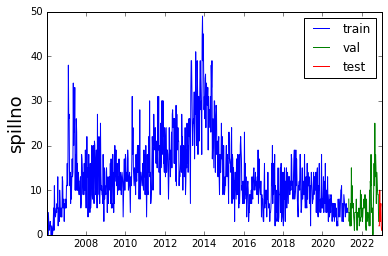

In [223]:
#plot the train,val,test split

plt.plot(data_train.index,data_train['spillno'])
plt.plot(data_val.index,data_val['spillno'])
plt.plot(data_test.index,data_test['spillno'])
plt.ylabel('spillno',fontsize=18)
plt.legend(['train','val','test'])
plt.show()


In [228]:
data_train.reset_index(inplace=True)
data_val.reset_index(inplace=True)
data_test.reset_index(inplace=True)

In [230]:
data_train.drop('incidentdate', axis=1, inplace=True)
data_val.drop('incidentdate',axis=1, inplace=True)
data_test.drop('incidentdate',axis=1, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [234]:
#Initialize h2o session
h2o.init(nthreads=-1)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,4 hours 10 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.1
H2O_cluster_version_age:,12 hours and 3 minutes
H2O_cluster_name:,H2O_from_python_unknownUser_3m7e13
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [235]:
# accessing H2OFlow UI
!npm install -g localtunnel -qq > /dev/null

In [236]:
get_ipython().system_raw('lt --port 54321 >> url.txt 2>&1 &')

In [237]:
#open the follwoing link to H2OFlow
!cat url.txt

your url is: https://sad-pugs-joke-35-186-188-57.loca.lt


In [238]:
#Convert pandas dataframes to h2o frames
hf_train = h2o.H2OFrame(data_train)
hf_val  = h2o.H2OFrame(data_val)
hf_test = h2o.H2OFrame(data_test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [239]:
#Select response and features
y = 'spillno'
X = hf_train.columns
X.remove(y)

In [240]:
#Run AutoML
aml = H2OAutoML(max_runtime_secs = 600,
                seed = 42)
aml.train(x = X, 
          y = y,
          training_frame = hf_train,
          leaderboard_frame = hf_test)


AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_grid_3_AutoML_1_20230209_64008_model_1


Status of Neuron Layers: predicting spillno, regression, gaussian distribution, Quadratic loss, 941 weights/biases, 16.0 KB, 1,086,640 training samples, mini-batch size 1
    layer    units    type              dropout    l1    l2    mean_rate              rate_rms               momentum    mean_weight           weight_rms          mean_bias           bias_rms
--  -------  -------  ----------------  ---------  ----  ----  ---------------------  ---------------------  ----------  --------------------  ------------------  ------------------  -----------------------
    1        3        Input             15.0
    2        20       RectifierDropout  0.0        0.0   0.0   0.0004584787991916528  0.000869824318215251   0.0         -0.03876810487903034  0.9275681972503662  0.5751850486580203  0.38301312923431396
    3        20       RectifierDropout  0.0        0.0   0.0   0.0027500022350295692  0.003498164936900139   0.0         -0.10904305886724615  0.4098348617553711  0.8582058943439304  0.2808055877685547
    4        20       RectifierDropout  0.0        0.0   0.0   0.011467159045696462   0.029180429875850677   0.0         -0.16234958738394198  0.5366108417510986  0.8839549404699503  0.44998741149902344
    5        1        Linear                       0.0   0.0   0.0009592053735104855  0.0013669850304722786  0.0         0.28948894459754226   0.751582145690918   1.9026389538670174  1.0971281125650402e-154

ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 27.472362457017173
RMSE: 5.241408442109542
MAE: 4.176052879590868
RMSLE: 0.4493190486597739
Mean Residual Deviance: 27.472362457017173

ModelMetricsRegression: deeplearning
** Reported on cross-validation data. **

MSE: 33.897594852832434
RMSE: 5.822164103907793
MAE: 4.560587543134747
RMSLE: 0.48566230841345087
Mean Residual Deviance: 33.897594852832434

Cross-Validation Metrics Summary: 
                        mean      sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ---------  ------------  ------------  ------------  ------------  ------------
mae                     4.52939   0.281368   4.2555        4.56945       4.76846       4.82915       4.22436
mean_residual_deviance  32.1899   2.66024    29.1084       33.3625       35.7274       32.7165       30.0346
mse                     32.1899   2.66024    29.1084       33.3625       35.7274       32.7165       30.0346
r2                      0.488249  0.0379433  0.471141      0.457366      0.469378      0.490688      0.552672
residual_deviance       32.1899   2.66024    29.1084       33.3625       35.7274       32.7165       30.0346
rmse                    5.66974   0.234298   5.39522       5.77603       5.97724       5.71983       5.48038
rmsle                   0.484342  0.0359569  0.459274      0.509611      0.483807      0.528694      0.440327

Scoring History: 
    timestamp            duration    training_speed    epochs    iterations    samples      training_rmse    training_deviance    training_mae    training_r2
--  -------------------  ----------  ----------------  --------  ------------  -----------  ---------------  -------------------  --------------  -------------
    2023-02-09 06:49:19  0.000 sec                     0         0             0            nan              nan                  nan             nan
    2023-02-09 06:49:19  50.273 sec  31960 obs/sec     10        1             7990         8.61036          74.1383              6.81978         -0.172255
    2023-02-09 06:49:24  55.327 sec  105528 obs/sec    700       70            559300       7.0796           50.1207              5.8357          0.207505
    2023-02-09 06:49:28  59.445 sec  115428 obs/sec    1360      136           1.08664e+06  5.24141          27.4724              4.17605         0.565614

Variable Importances: 
va